In [124]:
import numpy as np
import matplotlib.pyplot as plt
import os

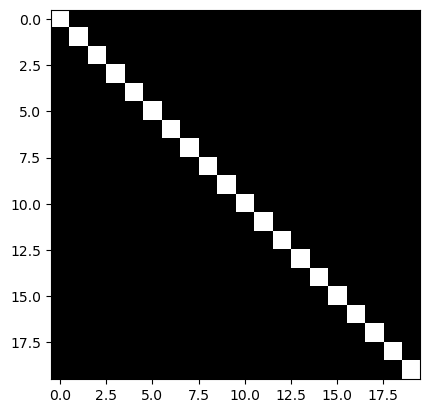

In [125]:
im = np.ones(20*20).reshape(20,20) + np.eye(20)
# im = np.array(([0,1]*10 + [1,0]*10)*10).reshape(20,20)
plt.imshow(im, cmap="gray")

In [78]:
im = np.random.randint(0,255, (20,20))/255

In [91]:
def global_contrast(array):
    return 1/255 * (array.max() - array.min())

In [207]:
def local_contrast(array):

    contrast = []
    # mask = np.array([0,1]*9)[:9].reshape(3,3)
    for i in range(1, array.shape[0]-1):
        for j in range(1, array.shape[1]-1):
                
                arr = array[i-1:i+2,j-1:j+2][(np.eye(3)+np.eye(3)[:,::-1])==0]
                con = abs(array[i,j] - arr.mean())
                contrast.append(con)
    return np.array(contrast).mean()

In [208]:
local_contrast(im)

4.140883710279716

In [195]:
print(f"Local contrast:{local_contrast(im)}")
print(f"Global contrast:{global_contrast(im)}")

Local contrast:255.0
Global contrast:1.0


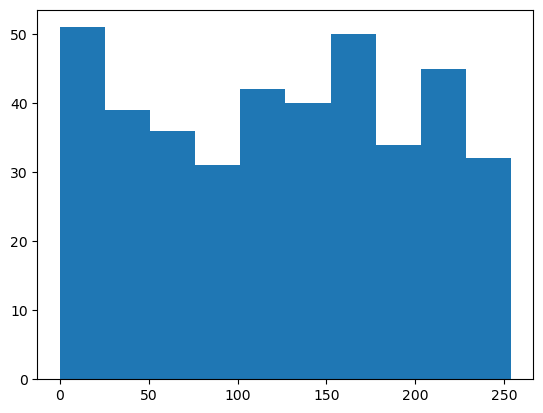

In [8]:
plt.hist(im.reshape(-1));

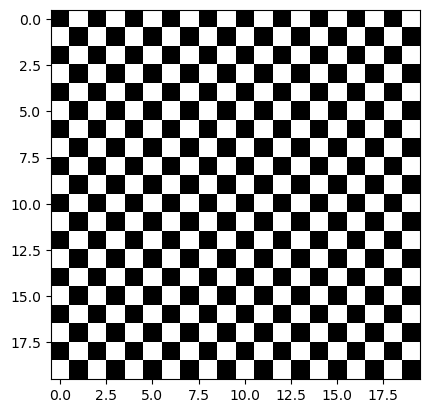

In [172]:
im = np.array(([0,1]*10 + [1,0]*10)*10).reshape(20,20)*255
plt.imshow(im, cmap="gray")

In [196]:
import cv2
IMG_PATH = os.path.join(os.path.abspath(""), "images")
frame = cv2.imread(os.path.join(IMG_PATH, "Colesdalen.JPG"))
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
im = cv2.resize(frame, (800, 500))

In [198]:
def local_contrast2(img: np.ndarray):
    shifted_up = np.zeros_like(img)
    shifted_down = np.zeros_like(img)
    shifted_left = np.zeros_like(img)
    shifted_right = np.zeros_like(img)

    shifted_left[0:,1:] = img[0:,:-1]
    shifted_right[0:,:-1] = img[0:,1:]
    shifted_down[1:,0:]=img[:-1,0:]
    shifted_up[:-1,0:]=img[1:,0:] 

    mean_neighbor_sum = (shifted_down + shifted_left + shifted_right + shifted_up) / 4

    local_contrast = np.sum(np.abs(img-mean_neighbor_sum)[1:-1, 1:-1]) / ((img.shape[0]-2)*(img.shape[1]-2))
    return local_contrast
# plt.imshow(local_contrast2(im))
# plt.title(f"{local_contrast2(im).shape}")
local_contrast2(im)

40.20660398486175

In [199]:
import itertools
def local_contrast_stockpy(img: np.ndarray):
    neighborhood_offsets = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    unnormalised_contrast_sum = 0
    for x_val, y_val in itertools.product(range(1, img.shape[0]-1), range(1, img.shape[1] -1)):
        neighborhood_sum = float(0)
        for (neighbor_x_offset, neighbor_y_offset) in neighborhood_offsets:
            neighborhood_sum += img[ x_val + neighbor_x_offset, y_val + neighbor_y_offset ]
        unnormalised_contrast_sum += abs(img[x_val, y_val] - (neighborhood_sum/4))
    local_contrast = unnormalised_contrast_sum / ((img.shape[0]-2)*(img.shape[1]-2))
    return local_contrast
local_contrast_stockpy(im)

4.140883710279716

$n\in[1,\dots,N-1]$
$m\in[1,\dots,M-1]$



$\displaystyle \sum_{i\in n}\sum_{j\in m}\left({g(i,j)-\frac{1}{4}\sum_{x,y}{g(x,y)}}\right)$